In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re
%matplotlib notebook

In [2]:
marketing_data =pd.read_csv("marketing_data.csv")
pd.set_option("display.max_columns", None)
marketing_data.head()
import warnings
warnings.filterwarnings('ignore')


In [3]:
marketing_data.head()

id  YearBirth   Education MaritalStatus       Income  Kidhome  Teenhome  \
0   1826       1970  Graduation      Divorced  $84,835.00         0         0   
1      1       1961  Graduation        Single  $57,091.00         0         0   
2  10476       1958  Graduation       Married  $67,267.00         0         1   
3   1386       1967  Graduation      Together  $32,474.00         1         1   
4   5371       1989  Graduation        Single  $21,474.00         1         0   

  DtCustomer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0    6/16/14        0       189        104              379              111   
1    6/15/14        0       464          5               64                7   
2    5/13/14        0       134         11               59               15   
3    5/11/14        0        10          0                1                0   
4     4/8/14        0         6         16               24               11   

   MntSweetProducts  MntGoldProducts  NumDealsPurchases  NumWebPurchases  \
0               189              218                  1                4   
1                 0               37                  1                7   
2                 2               30                  1                3   
3                 0                0                  1                1   
4                 0               34                  2                3   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                    4                  6                  1             0   
1                    3                  7                  5             0   
2                    2                  5                  2             0   
3                    0                  2                  7             0   
4                    1                  2                  7             1   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Response  Complain  \
0             0             0             0             0         1         0   
1             0             0             0             1         1         0   
2             0             0             0             0         0         0   
3             0             0             0             0         0         0   
4             0             0             0             0         1         0   

  Country  
0      SP  
1      CA  
2      US  
3     AUS  
4      SP

In [13]:
marketing_data.columns

Index(['id', 'YearBirth', 'Education', 'MaritalStatus', 'Income', 'Kidhome',
       'Teenhome', 'DtCustomer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProducts', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

In [14]:
marketing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   2240 non-null   int64 
 1   YearBirth            2240 non-null   int64 
 2   Education            2240 non-null   object
 3   MaritalStatus        2240 non-null   object
 4   Income               2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   DtCustomer           2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProducts      2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [31]:
# find out missing data
marketing_data.isnull().sum()

id                        0
year_birth                0
education                 0
marital_status            0
income                   24
kidhome                   0
teenhome                  0
dt_customer               0
recency                   0
mnt_wines                 0
mnt_fruits                0
mnt_meat_products         0
mnt_fish_products         0
mnt_sweet_products        0
mnt_gold_products         0
num_deals_purchases       0
num_web_purchases         0
num_catalog_purchases     0
num_store_purchases       0
num_web_visits_month      0
accepted_cmp3             0
accepted_cmp4             0
accepted_cmp5             0
accepted_cmp1             0
accepted_cmp2             0
response                  0
complain                  0
country                   0
dtype: int64

In [32]:
print(marketing_data.describe())

                 id   year_birth         income      kidhome     teenhome  \
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
std     3246.662198    11.984069   25173.076661     0.538398     0.544538   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           recency    mnt_wines   mnt_fruits  mnt_meat_products  \
count  2240.000000  2240.000000  2240.000000        2240.000000   
mean     49.109375   303.935714    26.302232         166.950000   
std      28.962453   336.597393    39.773434         225.715373   
min       0.000000     0.000000     0.

In [4]:
marketing_data.head()

id  YearBirth   Education MaritalStatus       Income  Kidhome  Teenhome  \
0   1826       1970  Graduation      Divorced  $84,835.00         0         0   
1      1       1961  Graduation        Single  $57,091.00         0         0   
2  10476       1958  Graduation       Married  $67,267.00         0         1   
3   1386       1967  Graduation      Together  $32,474.00         1         1   
4   5371       1989  Graduation        Single  $21,474.00         1         0   

  DtCustomer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0    6/16/14        0       189        104              379              111   
1    6/15/14        0       464          5               64                7   
2    5/13/14        0       134         11               59               15   
3    5/11/14        0        10          0                1                0   
4     4/8/14        0         6         16               24               11   

   MntSweetProducts  MntGoldProducts  NumDealsPurchases  NumWebPurchases  \
0               189              218                  1                4   
1                 0               37                  1                7   
2                 2               30                  1                3   
3                 0                0                  1                1   
4                 0               34                  2                3   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                    4                  6                  1             0   
1                    3                  7                  5             0   
2                    2                  5                  2             0   
3                    0                  2                  7             0   
4                    1                  2                  7             1   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Response  Complain  \
0             0             0             0             0         1         0   
1             0             0             0             1         1         0   
2             0             0             0             0         0         0   
3             0             0             0             0         0         0   
4             0             0             0             0         1         0   

  Country  
0      SP  
1      CA  
2      US  
3     AUS  
4      SP

In [9]:
# here we are convert dollar sign in to float

marketing_data['Income'] = marketing_data['Income'].replace('[\$,]','',regex=True).astype(float)
#summary status after convert

marketing_data['Income'].describe()

marketing_data.columns = [re.sub(r'(?<!^)(?=[A-Z])','_',x).lower() for x in marketing_data.columns]
# r means regular expression
#(?<!^) start bracket means match a block  ?<!^  this means except first character

# when the string is MaritalStatus ignore M

#(?=[A-Z]) means match every capital Letter S
# sub inserts "_" before S Marital_Status
# Lower function converts all characters to small Letters


    

In [10]:
marketing_data.columns

Index(['id', 'year_birth', 'education', 'marital_status', 'income', 'kidhome',
       'teenhome', 'dt_customer', 'recency', 'mnt_wines', 'mnt_fruits',
       'mnt_meat_products', 'mnt_fish_products', 'mnt_sweet_products',
       'mnt_gold_products', 'num_deals_purchases', 'num_web_purchases',
       'num_catalog_purchases', 'num_store_purchases', 'num_web_visits_month',
       'accepted_cmp3', 'accepted_cmp4', 'accepted_cmp5', 'accepted_cmp1',
       'accepted_cmp2', 'response', 'complain', 'country'],
      dtype='object')

<IPython.core.display.Javascript object>


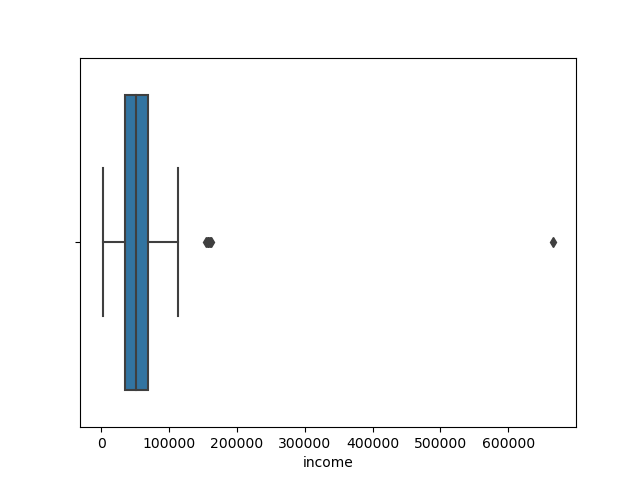

In [11]:
plt.figure()
sns.boxplot(marketing_data['income'])
plt.show()

<IPython.core.display.Javascript object>


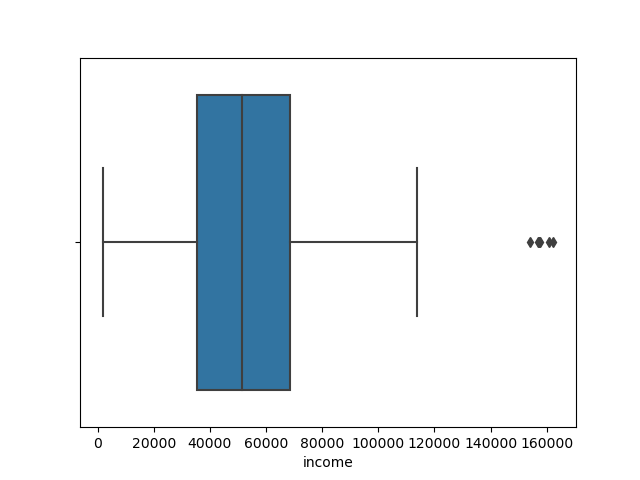

count      2215.000000
mean      51969.861400
std       21526.320095
min        1730.000000
25%       35284.000000
50%       51373.000000
75%       68487.000000
max      162397.000000
Name: income, dtype: float64

In [12]:
marketing_data = marketing_data[marketing_data['income']<300000]

plt.figure()
sns.boxplot(marketing_data["income"])
plt.show()

marketing_data['income'].describe()

In [13]:
marketing_data['income'] = marketing_data['income'].fillna(marketing_data['income'].mean())

In [14]:
marketing_data['age'] = 2022 - marketing_data['year_birth']

<IPython.core.display.Javascript object>


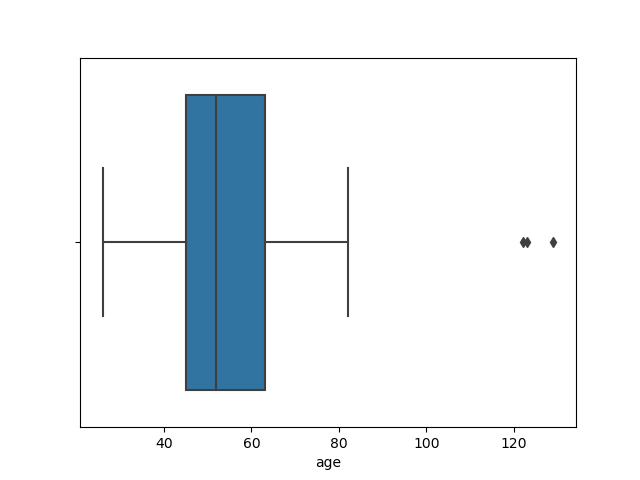

count    2215.000000
mean       53.183296
std        11.987000
min        26.000000
25%        45.000000
50%        52.000000
75%        63.000000
max       129.000000
Name: age, dtype: float64

In [15]:
plt.figure()
sns.boxplot(marketing_data["age"])
plt.show()

marketing_data["age"].describe()

In [16]:
marketing_data = marketing_data[marketing_data["age"]<100]

<IPython.core.display.Javascript object>


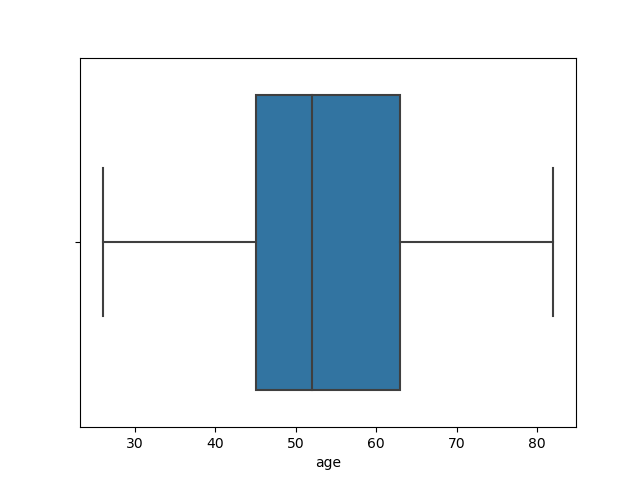

count    2212.000000
mean       53.086347
std        11.701599
min        26.000000
25%        45.000000
50%        52.000000
75%        63.000000
max        82.000000
Name: age, dtype: float64

In [17]:
plt.figure()
sns.boxplot(marketing_data['age'])
plt.show()

marketing_data["age"].describe()

<IPython.core.display.Javascript object>


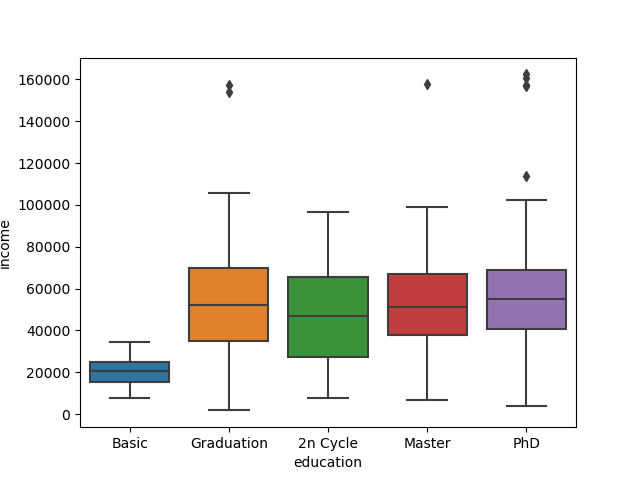

In [18]:
plt.figure()
sns.boxplot(x=marketing_data["education"],y=marketing_data["income"],order=["Basic","Graduation","2n Cycle","Master","PhD"])
plt.show()

<IPython.core.display.Javascript object>


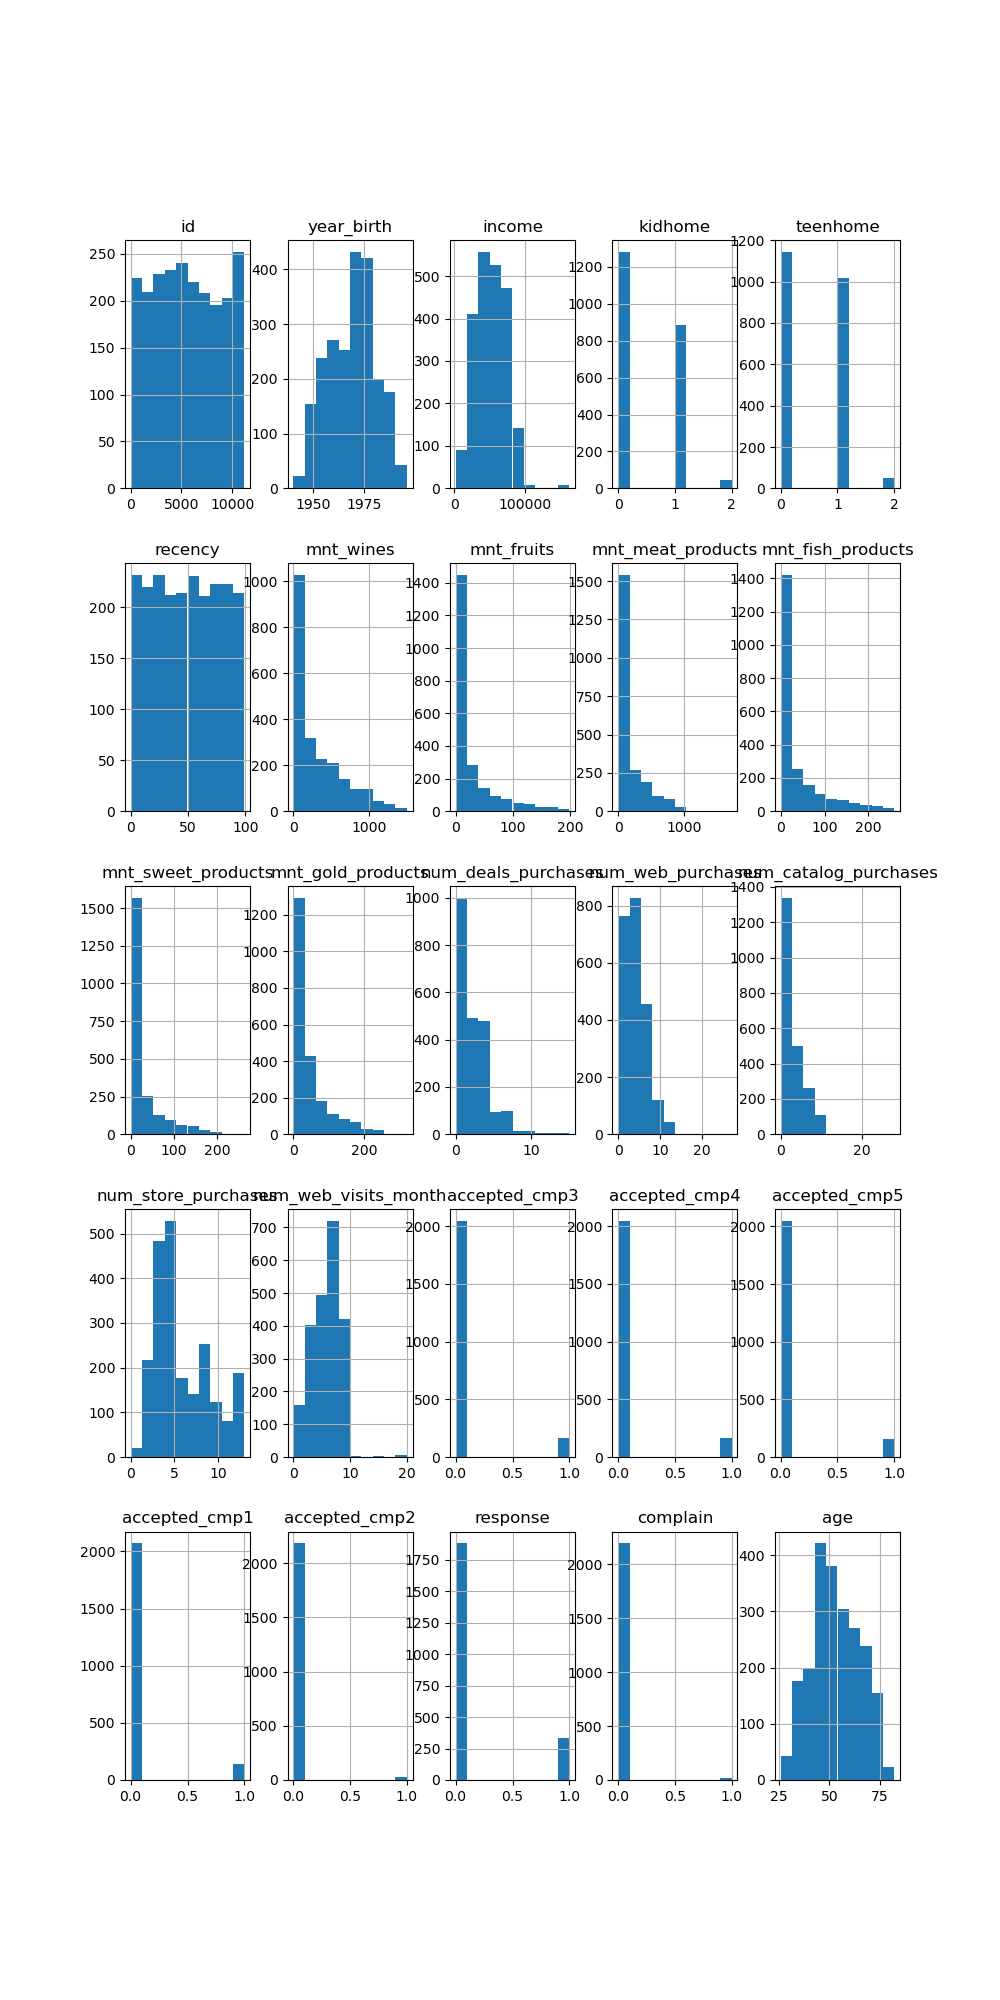

In [19]:
fig = plt.figure(figsize = (10,20))
ax = fig.gca()
marketing_data.hist(ax = ax);


In [20]:
marketing_data.corr()

id  year_birth    income   kidhome  teenhome  \
id                     1.000000    0.005086  0.000905  0.000971 -0.003508   
year_birth             0.005086    1.000000 -0.199977  0.237497 -0.361932   
income                 0.000905   -0.199977  1.000000 -0.514523  0.034565   
kidhome                0.000971    0.237497 -0.514523  1.000000 -0.039066   
teenhome              -0.003508   -0.361932  0.034565 -0.039066  1.000000   
recency               -0.044147   -0.015694  0.007965  0.010623  0.014392   
mnt_wines             -0.018906   -0.164615  0.688209 -0.497203  0.003945   
mnt_fruits             0.010008   -0.013447  0.507354 -0.373258 -0.175905   
mnt_meat_products     -0.003706   -0.033622  0.692279 -0.439031 -0.261134   
mnt_fish_products     -0.022405   -0.041154  0.520040 -0.388643 -0.205235   
mnt_sweet_products    -0.004381   -0.021516  0.523599 -0.377843 -0.163107   
mnt_gold_products     -0.008013   -0.059779  0.388299 -0.354922 -0.018579   
num_deals_purchases   -0.040849   -0.066156 -0.108207  0.216594  0.386805   
num_web_purchases     -0.017232   -0.162265  0.459265 -0.372327  0.162239   
num_catalog_purchases -0.000404   -0.125856  0.696589 -0.504598 -0.112477   
num_store_purchases   -0.011733   -0.138998  0.631424 -0.501863  0.049212   
num_web_visits_month  -0.008610    0.120282 -0.650257  0.447258  0.130985   
accepted_cmp3         -0.035668    0.061097 -0.015152  0.016135 -0.042797   
accepted_cmp4         -0.023692   -0.070035  0.219633 -0.162111  0.038168   
accepted_cmp5         -0.004441    0.019025  0.395569 -0.204582 -0.190119   
accepted_cmp1         -0.017989   -0.011941  0.327524 -0.174261 -0.145198   
accepted_cmp2         -0.014901   -0.007821  0.104036 -0.081911 -0.015633   
response              -0.021112    0.020937  0.161387 -0.077901 -0.154402   
complain               0.031839   -0.004602 -0.027900  0.037067  0.007746   
age                   -0.005086   -1.000000  0.199977 -0.237497  0.361932   

                        recency  mnt_wines  mnt_fruits  mnt_meat_products  \
id                    -0.044147  -0.018906    0.010008          -0.003706   
year_birth            -0.015694  -0.164615   -0.013447          -0.033622   
income                 0.007965   0.688209    0.507354           0.692279   
kidhome                0.010623  -0.497203   -0.373258          -0.439031   
teenhome               0.014392   0.003945   -0.175905          -0.261134   
recency                1.000000   0.015981   -0.005257           0.022914   
mnt_wines              0.015981   1.000000    0.385844           0.568081   
mnt_fruits            -0.005257   0.385844    1.000000           0.546740   
mnt_meat_products      0.022914   0.568081    0.546740           1.000000   
mnt_fish_products      0.000788   0.396915    0.593038           0.572986   
mnt_sweet_products     0.025244   0.389583    0.571474           0.534624   
mnt_gold_products      0.018148   0.391461    0.393459           0.357556   
num_deals_purchases    0.002591   0.009117   -0.134191          -0.121128   
num_web_purchases     -0.005680   0.553663    0.302301           0.306841   
num_catalog_purchases  0.024197   0.634237    0.485611           0.733787   
num_store_purchases   -0.000460   0.640219    0.459875           0.486349   
num_web_visits_month  -0.018965  -0.321616   -0.417741          -0.539194   
accepted_cmp3         -0.032361   0.061360    0.014644           0.018416   
accepted_cmp4          0.017520   0.373349    0.006598           0.091677   
accepted_cmp5          0.000233   0.472889    0.208990           0.375252   
accepted_cmp1         -0.021147   0.351610    0.192417           0.313379   
accepted_cmp2         -0.001429   0.206309   -0.009924           0.043549   
response              -0.200114   0.246320    0.123007           0.237966   
complain               0.005713  -0.036420   -0.002956          -0.021017   
age                    0.015694   0.164615    0.013447           0.033622   

                       

<IPython.core.display.Javascript object>


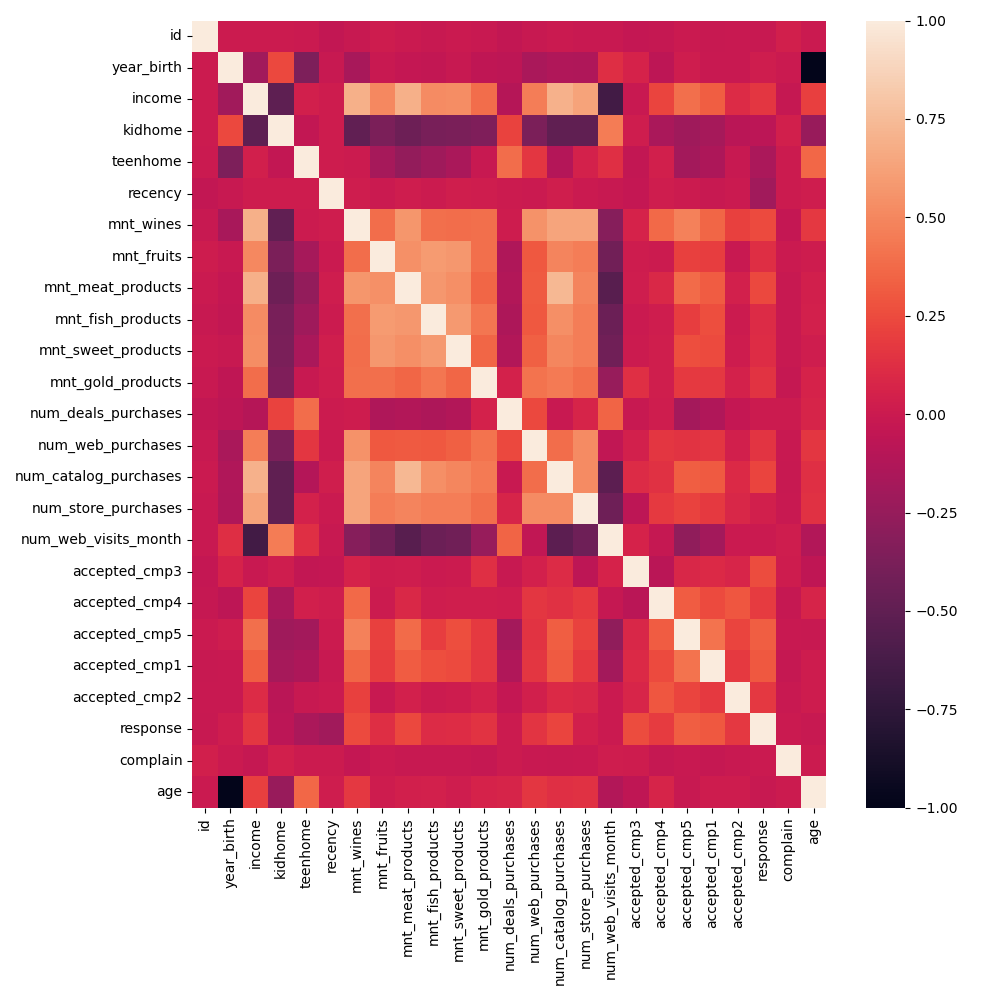

In [21]:
plt.figure(figsize=(10,10))
#heat matrix that shows correlation across all numerical variables
sns.heatmap(data=marketing_data.corr(),annot=False)
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


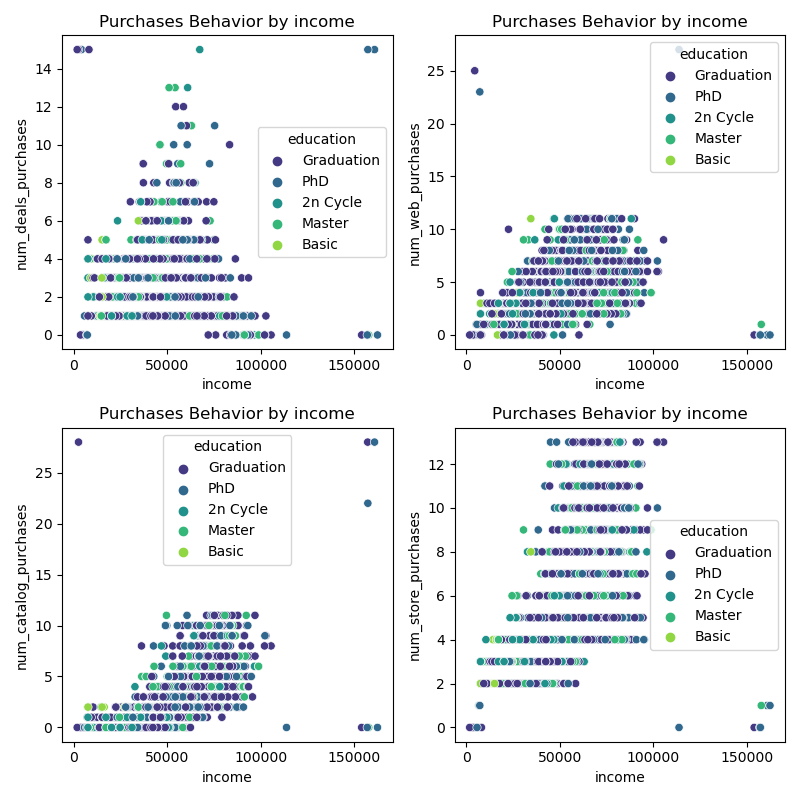

In [22]:
num_purchases_cols = ["num_deals_purchases","num_web_purchases","num_catalog_purchases","num_store_purchases"]

plot=0
fig = plt.figure(figsize=(8,8))


for i in range(len(num_purchases_cols)):
    plot += 1
    
    ax=plt.subplot(2,2,plot)
    
    sns.scatterplot(x=marketing_data["income"],y=marketing_data[num_purchases_cols[i]],
                   hue=marketing_data["education"],palette="viridis")
    plt.title("Purchases Behavior by income")
    
plt.tight_layout()
plt.show()
    


In [24]:
len(num_purchases_cols)

4

<IPython.core.display.Javascript object>


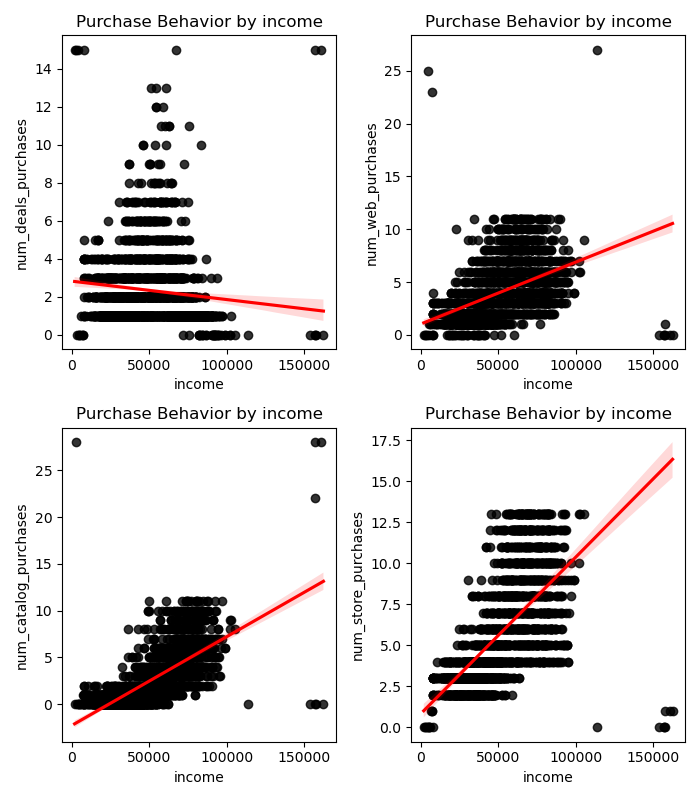

In [25]:
num_purchases_cols = ["num_deals_purchases","num_web_purchases","num_catalog_purchases","num_store_purchases"]

fig=plt.figure(figsize=(7,8))
plot=0

for i in range(len(num_purchases_cols)):
    plot +=1
    
    ax = plt.subplot(2,2,plot)
    sns.regplot(x=marketing_data["income"],y=marketing_data[num_purchases_cols[i]],
               scatter_kws={"color":"black"},line_kws={"color":"red"})
    plt.title("Purchase Behavior by income")
    
plt.tight_layout()
plt.show()

In [27]:
marketing_data["total_purchases"]=marketing_data["num_deals_purchases"]+marketing_data["num_catalog_purchases"]+marketing_data["num_store_purchases"]

<IPython.core.display.Javascript object>


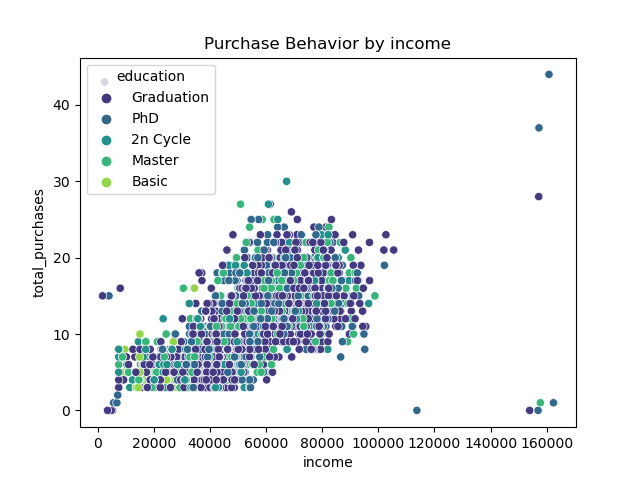

In [28]:
plt.figure()
sns.scatterplot(y=marketing_data["total_purchases"],x=marketing_data["income"],
               hue=marketing_data["education"],palette="viridis")
plt.title("Purchase Behavior by income")
plt.show()

<IPython.core.display.Javascript object>


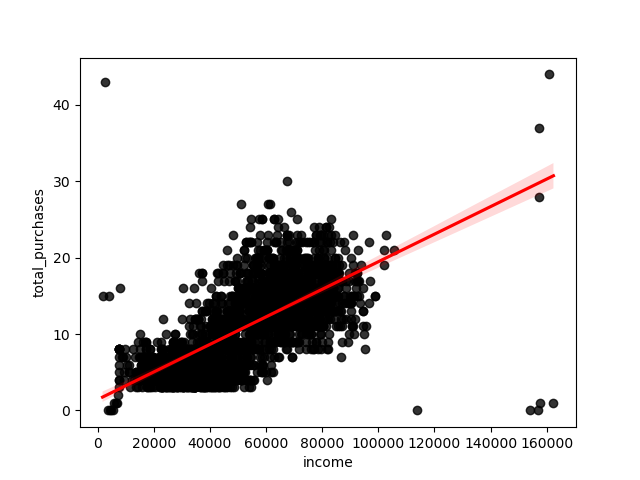

In [29]:
plt.figure()

sns.regplot(y=marketing_data["total_purchases"],x=marketing_data['income'],
           scatter_kws={"color":"black"},line_kws={"color":"red"})
plt.show()

<IPython.core.display.Javascript object>


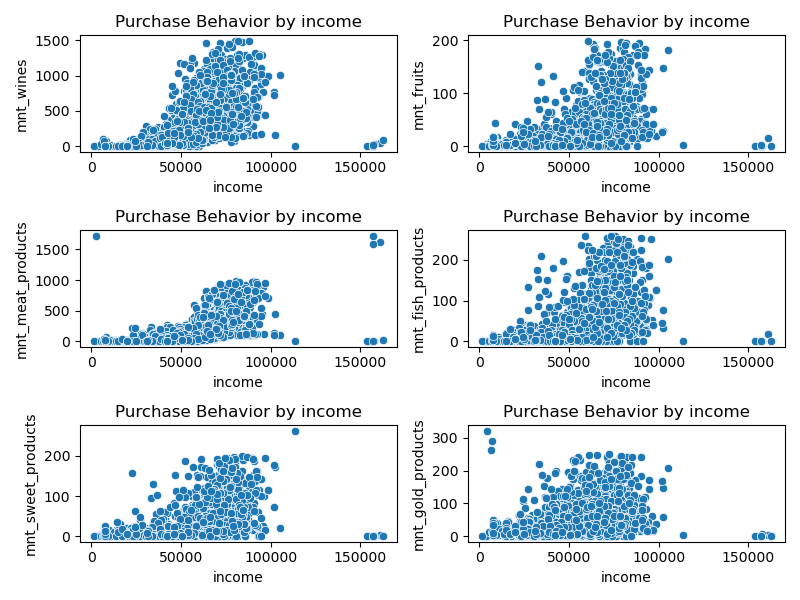

In [30]:
amounts_list=["mnt_wines","mnt_fruits","mnt_meat_products","mnt_fish_products","mnt_sweet_products","mnt_gold_products"]
plot=0
fig=plt.figure(figsize=(8,6))
for i in range(len(amounts_list)):
    plot +=1
    
    ax = plt.subplot(3,2,plot)
    
    sns.scatterplot(y=marketing_data[amounts_list[i]], x=marketing_data["income"])
    plt.title("Purchase Behavior by income")
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


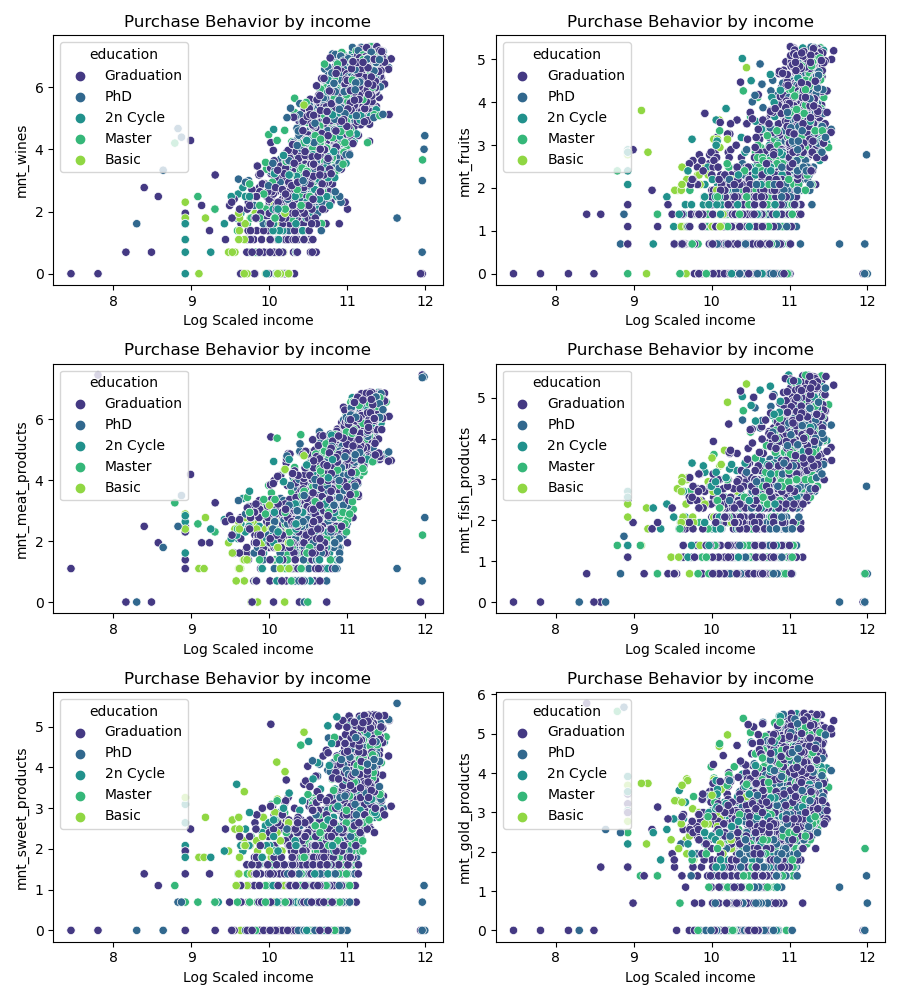

In [31]:
amounts_list=["mnt_wines","mnt_fruits","mnt_meat_products","mnt_fish_products","mnt_sweet_products","mnt_gold_products"]
axes = [None for column in amounts_list]
plot = 0
fig = plt.figure(figsize=(9,10))
for i in range(len(amounts_list)):
    plot += 1
    ax=plt.subplot(3,2,plot)
    sns.scatterplot(y=np.log(marketing_data[amounts_list[i]]), x=np.log(marketing_data["income"]),
                   hue=marketing_data["education"],palette="viridis")
    ax.set_xlabel("Log Scaled income")
    plt.title("Purchase Behavior by income")
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


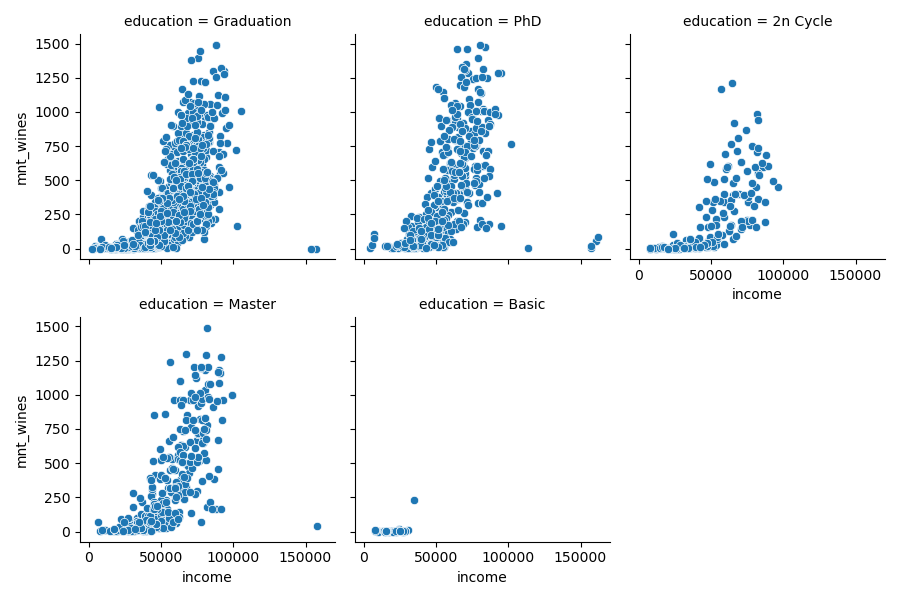

<IPython.core.display.Javascript object>


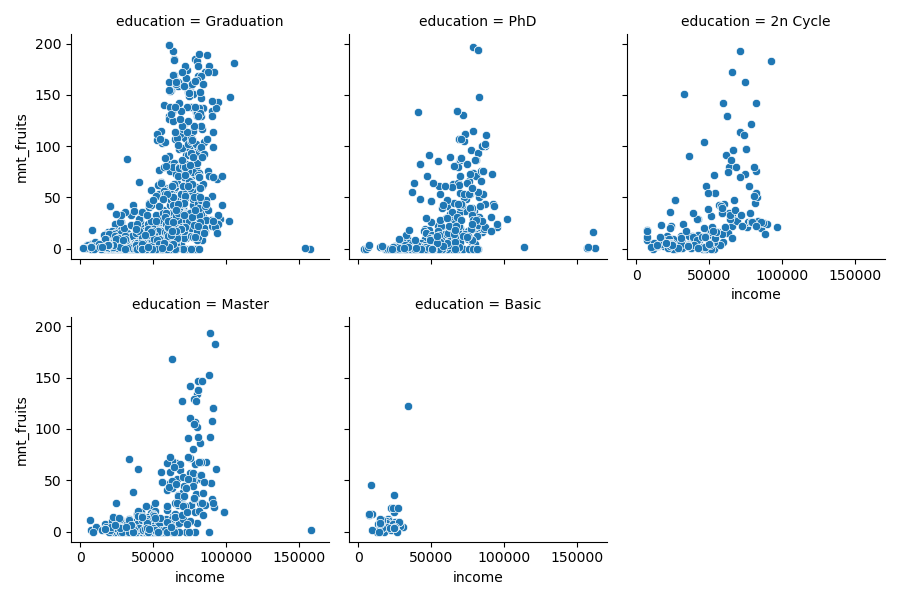

<IPython.core.display.Javascript object>


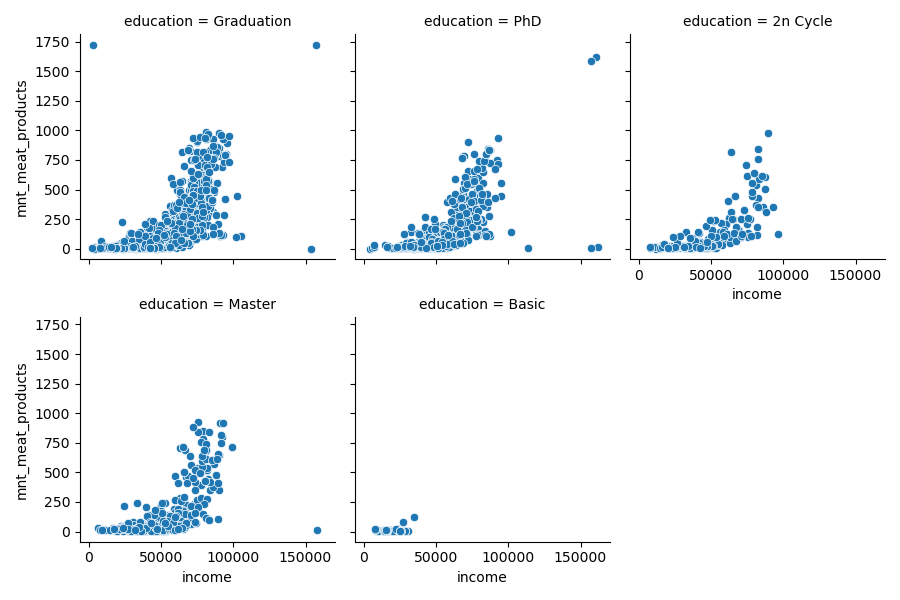

<IPython.core.display.Javascript object>


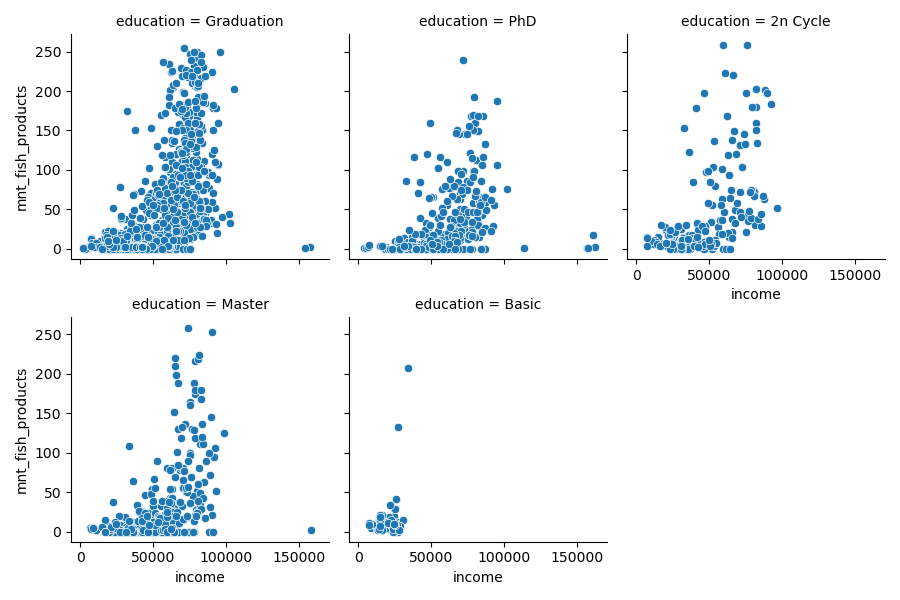

<IPython.core.display.Javascript object>


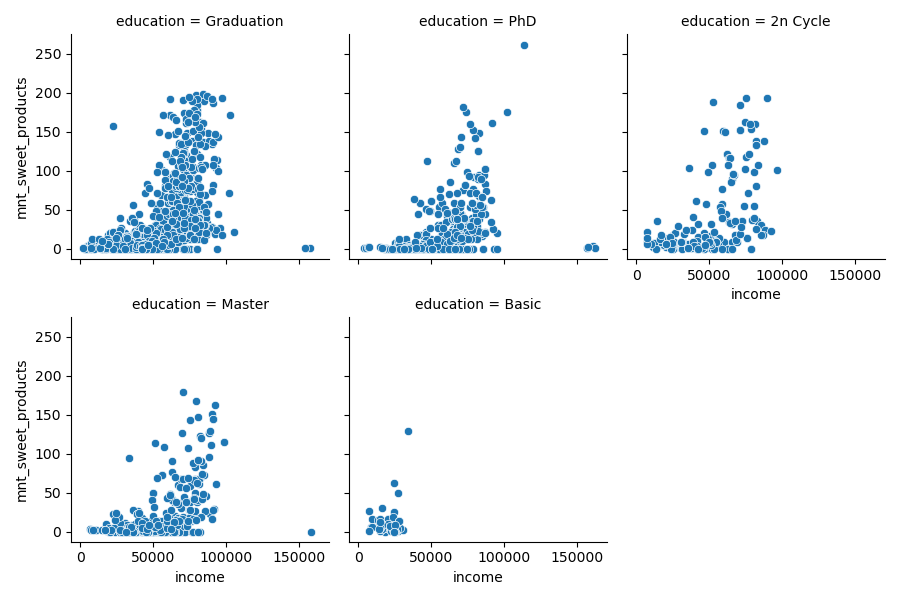

<IPython.core.display.Javascript object>


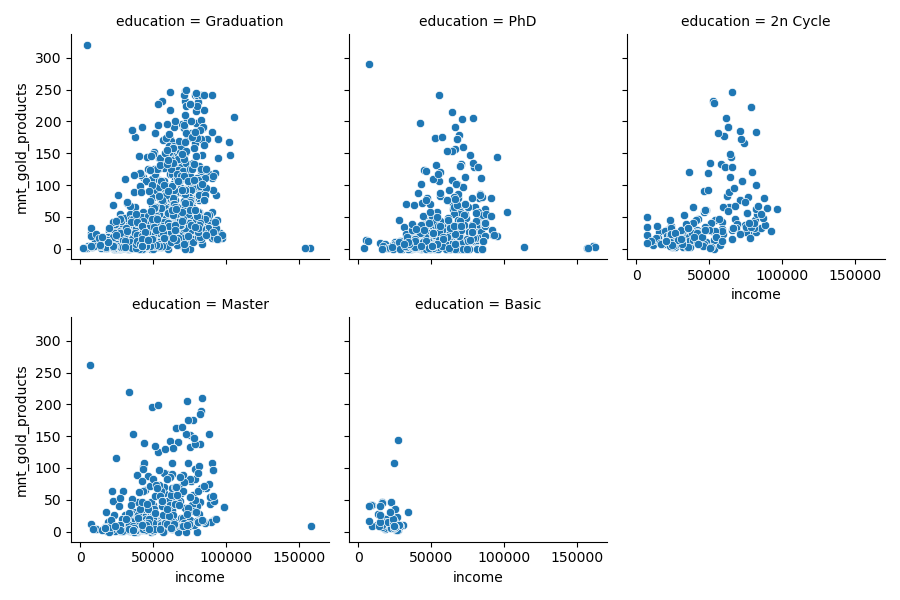

In [33]:
variable_names = {}
amounts_list=["mnt_wines","mnt_fruits","mnt_meat_products","mnt_fish_products","mnt_sweet_products","mnt_gold_products"]

for i in range(6):
    
    variable_names["g{0}".format(i)] = sns.FacetGrid(marketing_data,col="education",col_wrap=3)
    
    variable_names["g{0}".format(i)].map(sns.scatterplot,"income", amounts_list[i])
plt.show()

<IPython.core.display.Javascript object>


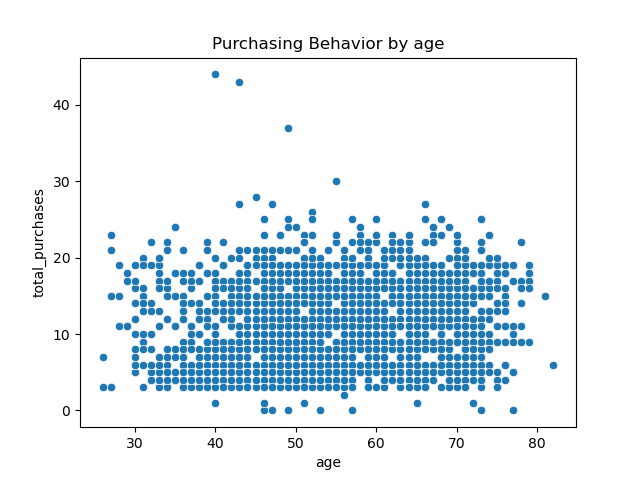

In [34]:
plt.figure()
sns.scatterplot(x=marketing_data["age"],y=marketing_data["total_purchases"])
plt.title("Purchasing Behavior by age")
plt.show()

<IPython.core.display.Javascript object>


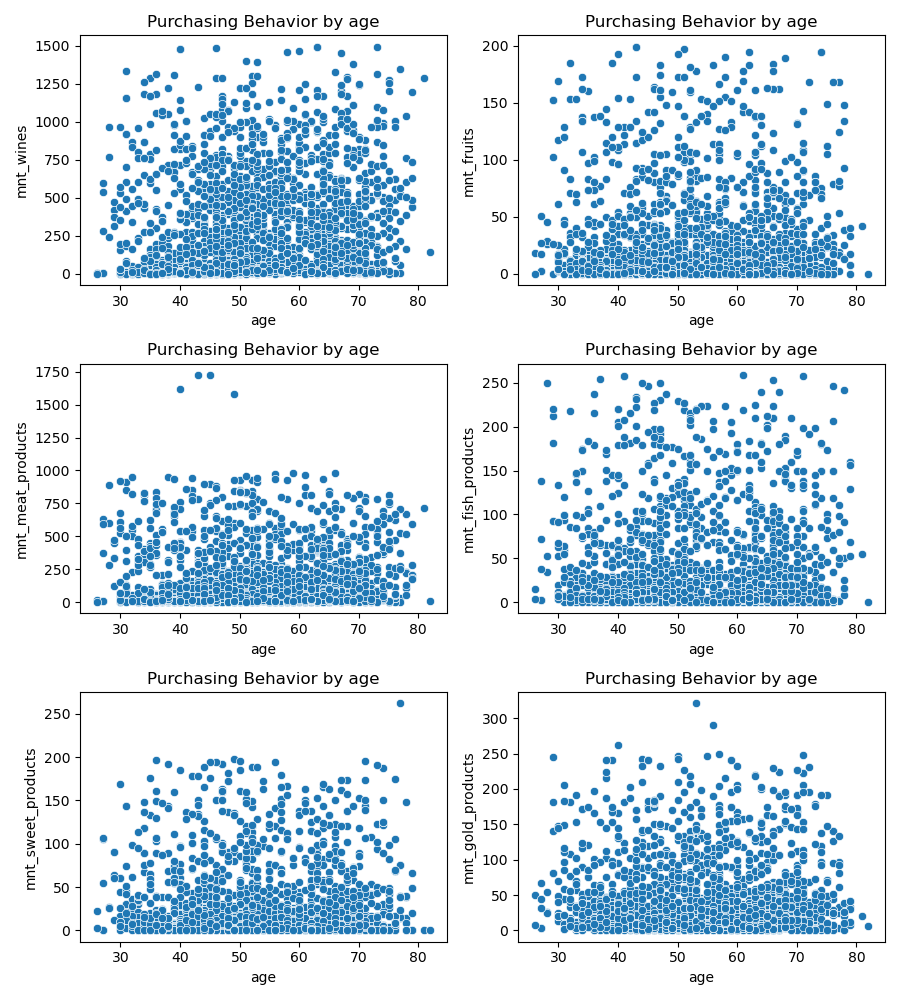

In [36]:
amounts_list=["mnt_wines","mnt_fruits","mnt_meat_products","mnt_fish_products","mnt_sweet_products","mnt_gold_products"]
plot = 0
fig = plt.figure(figsize=(9,10))
for i in range(len(amounts_list)):
    plot +=1
    ax = plt.subplot(3,2,plot)
    sns.scatterplot(y=marketing_data[amounts_list[i]],x=marketing_data['age'])
    plt.title("Purchasing Behavior by age")
    plt.tight_layout()
    plt.show()

<IPython.core.display.Javascript object>


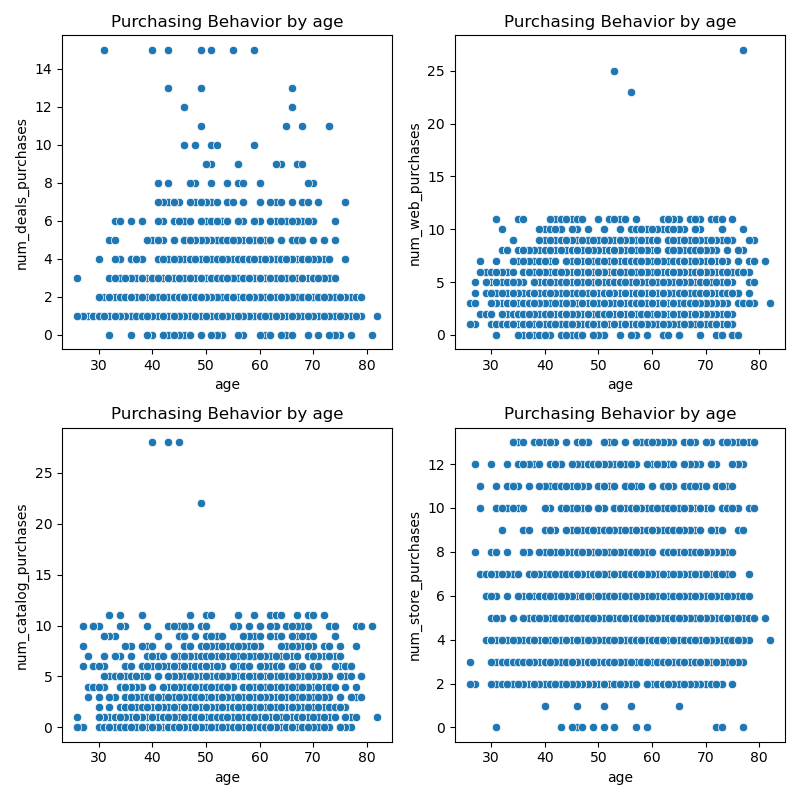

In [37]:
num_purchases_cols = ["num_deals_purchases","num_web_purchases","num_catalog_purchases","num_store_purchases"]
plot = 0
fig = plt.figure(figsize=(8,8))
for i in range(len(num_purchases_cols)):
    plot +=1
    ax = plt.subplot(2,2,plot)
    sns.scatterplot(y=marketing_data[num_purchases_cols[i]],x=marketing_data['age'])
    plt.title("Purchasing Behavior by age")
    plt.tight_layout()
    plt.show();

In [38]:
def age_groups(age):
    if 18 <=age<=35:
        return '18 to 35'
    elif 35<=age<=50:
        return '36 to 50'
    elif 50<=age<=70:
        return '51 to 70'
    else:
        return '71 and older'
    
marketing_data['age_group']=marketing_data['age'].apply(age_groups)

<IPython.core.display.Javascript object>


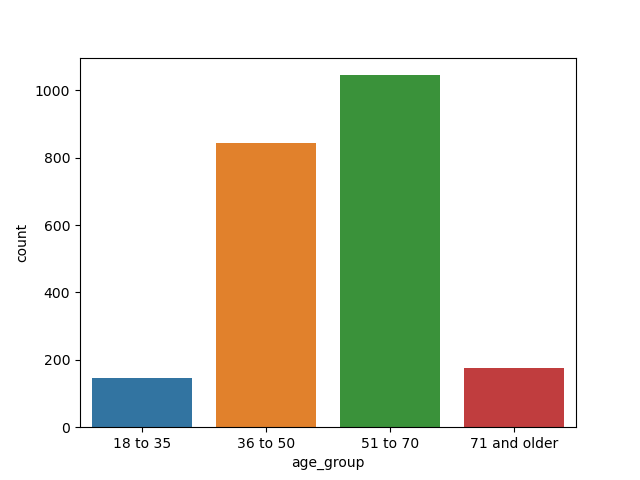

In [39]:
plt.figure()
sns.countplot(marketing_data['age_group'],order=['18 to 35','36 to 50','51 to 70','71 and older'])
plt.show()

In [40]:
age_plus_amounts = marketing_data.loc[:,('age','mnt_wines','mnt_fruits','mnt_meat_products','mnt_fish_products','mnt_sweet_products','mnt_gold_products')]

bins = [18,35,50,70,150]

labels = ['18 to 35','36 to 50','51 to 70','71 and older']

age_plus_amounts['age_group'] = pd.cut(age_plus_amounts.age, bins=bins,labels=labels)
age_plus_amounts=age_plus_amounts.groupby('age_group').sum().reset_index()


In [41]:
print(age_plus_amounts)

      age_group    age  mnt_wines  mnt_fruits  mnt_meat_products  \
0      18 to 35   4735      42256        5049              33477   
1      36 to 50  37312     202869       19599             123281   
2      51 to 70  62351     357309       28147             175138   
3  71 and older  13029      72862        5446              37574   

   mnt_fish_products  mnt_sweet_products  mnt_gold_products  
0               6680                4872               7031  
1              28328               20797              32846  
2              39807               28506              48451  
3               8464                5652               8836  


<IPython.core.display.Javascript object>


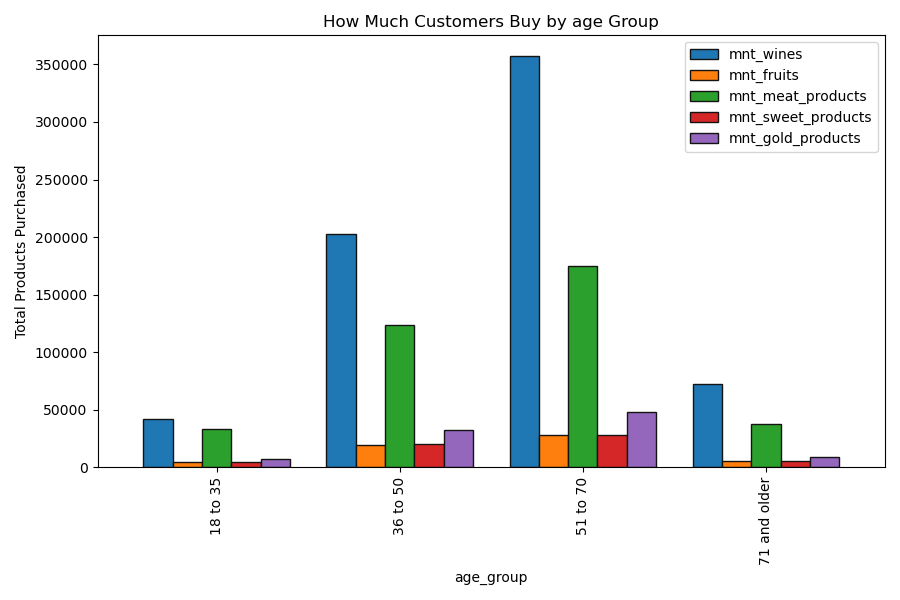

In [42]:
fig,ax = plt.subplots(figsize=(9,6))

col_products = [
    'mnt_wines',
    'mnt_fruits',
    'mnt_meat_products',
    'mnt_sweet_products',
    'mnt_gold_products'
]

age_plus_amounts.plot(x='age_group',y=col_products,kind='bar',ax=ax,width=0.8,edgecolor='#131313')
plt.title("How Much Customers Buy by age Group")
plt.ylabel("Total Products Purchased")
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


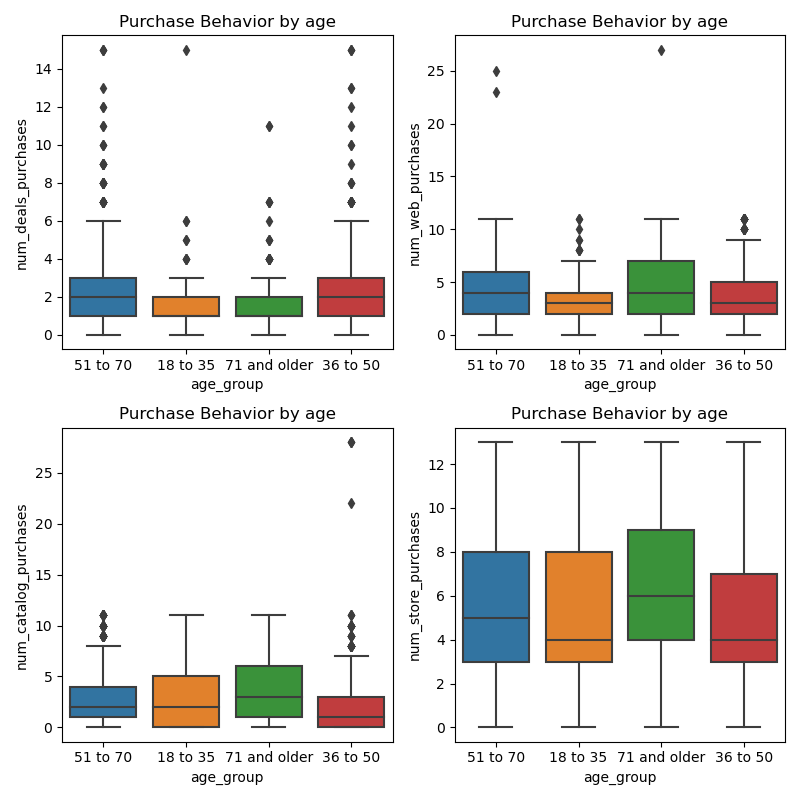

In [43]:
num_purchases_cols = ["num_deals_purchases","num_web_purchases","num_catalog_purchases","num_store_purchases"]
plot = 0
fig = plt.figure(figsize=(8,8))

for i in range(len(num_purchases_cols)):
    
    plot += 1
    ax= plt.subplot(2,2,plot)
    sns.boxplot(x=marketing_data["age_group"], y=marketing_data[num_purchases_cols[i]]),
    order =["18 to 35","36 to 50","51 to 70","71  and older"]
    plt.title("Purchase Behavior by age")
    
plt.tight_layout()
plt.show()
    
    